In [1]:


# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# other
import re



In [2]:
df = pd.read_csv('City_of_Seattle_Wage_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12143 entries, 0 to 12142
Data columns (total 5 columns):
Department      12143 non-null object
Last Name       12143 non-null object
First Name      12143 non-null object
Job Title       12143 non-null object
Hourly Rate     12143 non-null float64
dtypes: float64(1), object(4)
memory usage: 474.4+ KB


In [4]:
df.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate '], dtype='object')

In [5]:
df.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Police Department,Aagard,Lori,Pol Lieut,80.07
1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84
2,Parks & Recreation,Aamot,Allison,Rec Attendant *,17.35
3,Seattle Public Utilities,Aar,Abdimallik,"Civil Engrng Spec,Sr",54.07
4,Parks & Recreation,Aban,Eduardo,"Civil Engr,Sr",58.36


In [8]:
df['Salary'] = (df['Hourly Rate '] *2) * 1000

In [10]:
df.head(10)

,Department,Last Name,First Name,Job Title,Hourly Rate,Salary
0,Police Department,Aagard,Lori,Pol Lieut,80.07,160140.0
1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84,121680.0
2,Parks & Recreation,Aamot,Allison,Rec Attendant *,17.35,34700.0
3,Seattle Public Utilities,Aar,Abdimallik,"Civil Engrng Spec,Sr",54.07,108140.0
4,Parks & Recreation,Aban,Eduardo,"Civil Engr,Sr",58.36,116720.0
5,Seattle Public Utilities,Abanes,Rick,Wtr Treatment Op-WDM I,33.92,67840.0
6,Seattle City Light,Abarca,Fredy,Pwr Structs Mechanic,44.67,89340.0
7,Seattle Public Utilities,Abatayo,Adora,Util Act Rep I,28.11,56220.0
8,Seattle Dept of Transportation,Abayneh,Haregewoyen,Engrng Aide *,31.18,62360.0
9,Seattle City Light,Abbott,Jeremy,Elecl Work Rev CC,57.62,115240.0


In [100]:
df.sort_values('Salary', ascending=False).head(5)

,Department,Last Name,First Name,Job Title,Hourly Rate,Salary,Fire,Police,Chief
10106,Seattle City Light,Smith,Deborah,City Light General Mgr&CEO,175.450,350900.0,False,False,False
4422,Seattle Public Utilities,Hara,Mami,SPU General Mgr&CEO,148.460,296920.0,False,False,False
4596,Seattle City Light,Haynes,Michael,"Electric Util Exec 3,Ofcr",140.928,281856.0,False,False,False
950,Police Department,Best,Carmen,Seattle Police Chief,140.870,281740.0,False,True,True
710,Information Technology,Bashir,Saad,Chief Technology Officer,140.212,280424.0,False,False,True


In [114]:
df['Department'].value_counts().head(10)

Police Department                 2016
Seattle City Light                1731
Parks & Recreation                1440
Seattle Public Utilities          1409
Fire Department                   1083
Seattle Dept of Transportation    1017
Information Technology             716
Finance & Admin Services           585
Seattle Center                     566
Human Services Department          387
Name: Department, dtype: int64

In [113]:
df['Job Title'].value_counts().head(10)

Pol Ofcr-Patrl-BWV        385
Fireftr-90.46 Hrs         315
Info Technol Prof B-BU    284
Pol Ofcr-BWV              280
Maint Laborer             197
Rec Attendant *           184
Lifeguard *               162
Fireftr-Ap Drvr-90.46     160
Stage Tech *              145
StratAdvsr2,Exempt        139
Name: Job Title, dtype: int64

In [13]:
df['Job Title'].shape

(12143,)

In [15]:
uniquejobs=df['Job Title'].unique()

In [18]:
uniquejobs

array(['Pol Lieut', 'Pol Ofcr-Detective', 'Rec Attendant *', ...,
       'Dev Fin Spec I', 'Lock Tech,Sr', 'Elec-Con CC-Asg Crew Coord'],
      dtype=object)

In [48]:
# police or fire department
def ispolice(department):
    if 'Police' in department:
        return True
    else:
        return False



In [72]:
def isfire(department):
    if 'Fire' in department:
        return True
    else:
        return False

In [101]:
def isit(department):
    if 'Information Technology' in department:
        return True
    else:
        return False

In [61]:
df['Police'] = df['Department'].apply(lambda x: ispolice(x))


In [104]:
df[df['Police']].head(3)

,Department,Last Name,First Name,Job Title,Hourly Rate,Salary,Fire,Police,Chief
0,Police Department,Aagard,Lori,Pol Lieut,80.07,160140.0,False,True,False
1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84,121680.0,False,True,False
10,Police Department,Abdi,Habtamu,"StratAdvsr2,Exempt",54.28,108560.0,False,True,False


In [74]:
df['Fire'] = df['Department'].apply(lambda x: isfire(x))

In [103]:
df[df['Fire']].head(3)

,Department,Last Name,First Name,Job Title,Hourly Rate,Salary,Fire,Police,Chief
48,Fire Department,Adamich,Michael,Fireftr-SLT-90.46 Hrs,47.56,95120.0,True,False,False
49,Fire Department,Adamich,Chase,Fireftr-90.46 Hrs,42.71,85420.0,True,False,False
61,Fire Department,Adams,Paul,"Fire Lieut, Sr-90.46 Hrs",54.36,108720.0,True,False,False


In [105]:
df['IT'] = df['Department'].apply(lambda x: isit(x))

In [76]:
df['Fire'].value_counts()

False    11060
True      1083
Name: Fire, dtype: int64

In [67]:
df['Police'].value_counts()

False    10118
True      2025
Name: Police, dtype: int64

In [106]:
df['IT'].value_counts()

False    11427
True       716
Name: IT, dtype: int64

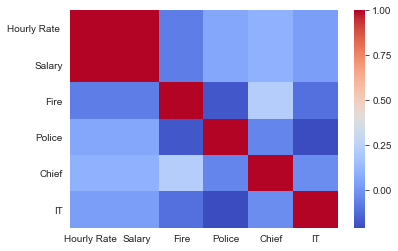

In [107]:
# Heatmap on Base Pay < 100000 - does it correlate to other types of pay?
sns.heatmap(df[df['Salary'] > 100000].corr(),cmap='coolwarm')


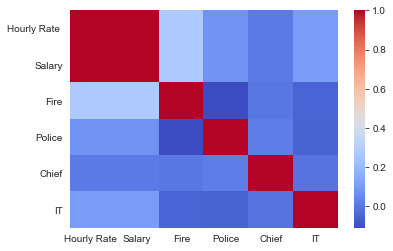

In [109]:
# Heatmap on Base Pay < 100000 - does it correlate to other types of pay?
sns.heatmap(df[df['Salary'] < 100000].corr(),cmap='coolwarm')



In [86]:
df[['Police','Salary']].corr()

,Police,Salary
Police,1.000000,0.193176
Salary,0.193176,1.000000


In [87]:
df[['Fire','Salary']].corr()

,Fire,Salary
Fire,1.000000,0.073433
Salary,0.073433,1.000000


In [110]:
df[['IT','Salary']].corr()

,IT,Salary
IT,1.000000,0.190993
Salary,0.190993,1.000000


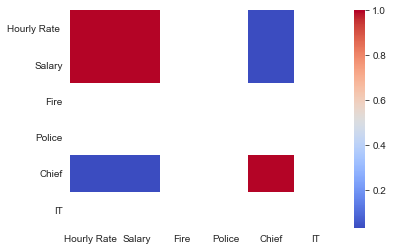

In [111]:
sns.heatmap(df[df['Police']].corr(),cmap='coolwarm')


In [112]:
def ischief(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [116]:
def isceo(title):
    if 'CEO' in title.lower():
        return True
    else:
        return False

In [92]:
df['Chief'] =  df['Job Title'].apply(lambda x: ischief(x))

In [121]:
df['CEO'] =  df['Job Title'].apply(lambda x: isceo(x))

In [93]:
df['Chief'].value_counts()

False    12089
True        54
Name: Chief, dtype: int64

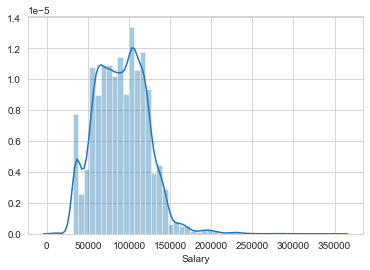

In [94]:
sns.distplot(df[df['Salary'] > 1000]['Salary'])

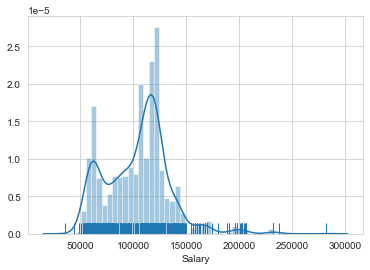

In [96]:
sns.distplot(df[df['Police']]['Salary'].dropna(), bins=50, rug=True, kde=True)

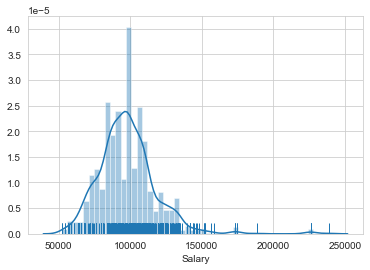

In [97]:
sns.distplot(df[df['Fire']]['Salary'].dropna(), bins=50, rug=True, kde=True)

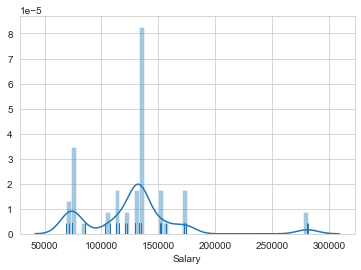

In [95]:
sns.distplot(df[df['Chief']]['Salary'].dropna(), bins=50, rug=True, kde=True)

In [98]:
df[df['Chief']].corr().style.background_gradient(cmap='coolwarm')

,Hourly Rate,Salary,Fire,Police,Chief
Hourly Rate,1,1,0.344866,-0.0125544,nan
Salary,1,1,0.344866,-0.0125544,nan
Fire,0.344866,0.344866,1,-0.368782,nan
Police,-0.0125544,-0.0125544,-0.368782,1,nan
Chief,nan,nan,nan,nan,nan
